In [2]:
import tensorflow as tf
import numpy as np

### Load the prepared MNIST data

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data')
train_X = mnist.train.images
train_y = np.asarray(mnist.train.labels, dtype=np.int32)
test_X = mnist.test.images 
test_y = np.asarray(mnist.test.labels, dtype=np.int32)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


### Define a CNN model that can classify MNIST images w.r.t. the underlying digits 0-9

In [4]:
def model(features, labels, mode):
    
    # declare an input layer by reshaping the input feature to an arbitrary sequence (batch size) of 28x28 images with 1 channel
    input_layer = tf.reshape(features['x'], [-1,28,28,1])
    
    # declare a 2-d convolutional layer with 8 filters, 5x5 kernels, "same" padding and ReLU activation function
    conv1 = tf.layers.conv2d(inputs=input_layer, filters=8, kernel_size=[5, 5], padding='same',activation=tf.nn.relu)
    
    # declare a 2-d  max pooling layer with 2x2 pool size and stride 2
    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)
    # -> BATCH_SIZEx14x14x8-layers
    
    # declare a 2-d convolutional layer with 16 filters, 5x5 kernels, "same" padding and ReLU activation function
    conv2 = tf.layers.conv2d(inputs=pool1, filters=16, kernel_size=[5, 5], padding="same", activation=tf.nn.relu)
    
    # declare a 2-d  max pooling layer with 2x2 pool size and stride 2
    pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)
    # -> BATCH_SIZEx7x7x16-layers
    
    #conv3 = tf.layers.conv2d(inputs=pool2, filters=16, kernel_size=[4, 4], padding="valid", activation=tf.nn.relu)
    #pool3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=[2, 2], strides=2)
    # -> BATCH_SIZEx2x2x16-layers
    
    # flatten the last layer to an arbitray number (batch size) of 1-d units
    pool2_flat = tf.contrib.layers.flatten(pool2)
    # -> BATCH_SIZEx784
    
    # declare a dense layer with 64 units and ReLU activation function
    dense = tf.layers.dense(inputs=pool2_flat, units=64, activation=tf.nn.relu)
    # -> BATCH_SIZEx64
    
    # declare a dense layer with 10 units (digit 0-9 output classes/logits)
    logits = tf.layers.dense(inputs=dense, units=10)
    # -> BATCH_SIZEx10
    
    predictions = tf.argmax(input=logits, axis=1)
    
    # return the estimator when predicting (no loss and training function needs to be defined here)
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)
    
    # declare the loss function sparse softmax cross entropy
    loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

    # declare a gradient descent optimizer with learning rate 0.001
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    
    train_op = optimizer.minimize(loss=loss, global_step=tf.train.get_global_step())
        
    # define the accuracy error metric
    eval_metric_ops = {
        "accuracy": tf.metrics.accuracy(labels=labels, predictions=predictions)
    }
    
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op, predictions=predictions, eval_metric_ops=eval_metric_ops)

### Create the Estimator and train the model for 25000 steps

In [5]:
mnist_classifier = tf.estimator.Estimator(model_fn=model, model_dir="ex_05_mnist_model")

train_input = tf.estimator.inputs.numpy_input_fn(x={"x": train_X}, y=train_y, batch_size=100, num_epochs=None, shuffle=True)
mnist_classifier.train(input_fn=train_input, steps=25000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'ex_05_mnist_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000022AFD484358>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into ex_05_mnist_model\model.ckpt.
IN

INFO:tensorflow:loss = 0.20975128, step = 7301 (4.457 sec)
INFO:tensorflow:global_step/sec: 21.2143
INFO:tensorflow:loss = 0.235243, step = 7401 (4.714 sec)
INFO:tensorflow:global_step/sec: 22.3911
INFO:tensorflow:loss = 0.24700929, step = 7501 (4.482 sec)
INFO:tensorflow:global_step/sec: 22.3771
INFO:tensorflow:loss = 0.19733845, step = 7601 (4.453 sec)
INFO:tensorflow:global_step/sec: 21.3068
INFO:tensorflow:loss = 0.17393714, step = 7701 (4.693 sec)
INFO:tensorflow:global_step/sec: 21.4587
INFO:tensorflow:loss = 0.3409069, step = 7801 (4.660 sec)
INFO:tensorflow:global_step/sec: 22.4867
INFO:tensorflow:loss = 0.21908005, step = 7901 (4.447 sec)
INFO:tensorflow:global_step/sec: 22.5214
INFO:tensorflow:loss = 0.25869796, step = 8001 (4.440 sec)
INFO:tensorflow:global_step/sec: 21.3921
INFO:tensorflow:loss = 0.16426101, step = 8101 (4.690 sec)
INFO:tensorflow:global_step/sec: 22.5046
INFO:tensorflow:loss = 0.18064101, step = 8201 (4.444 sec)
INFO:tensorflow:global_step/sec: 22.5033
INF

INFO:tensorflow:loss = 0.10195956, step = 15401 (4.454 sec)
INFO:tensorflow:global_step/sec: 22.414
INFO:tensorflow:loss = 0.11331583, step = 15501 (4.461 sec)
INFO:tensorflow:global_step/sec: 21.009
INFO:tensorflow:loss = 0.054897413, step = 15601 (4.760 sec)
INFO:tensorflow:global_step/sec: 16.7438
INFO:tensorflow:loss = 0.132577, step = 15701 (5.988 sec)
INFO:tensorflow:global_step/sec: 22.0003
INFO:tensorflow:loss = 0.11413332, step = 15801 (4.545 sec)
INFO:tensorflow:global_step/sec: 21.8995
INFO:tensorflow:loss = 0.28010055, step = 15901 (4.551 sec)
INFO:tensorflow:global_step/sec: 21.7191
INFO:tensorflow:loss = 0.15417896, step = 16001 (4.604 sec)
INFO:tensorflow:global_step/sec: 22.5813
INFO:tensorflow:loss = 0.12981734, step = 16101 (4.428 sec)
INFO:tensorflow:global_step/sec: 22.5018
INFO:tensorflow:loss = 0.20960246, step = 16201 (4.444 sec)
INFO:tensorflow:global_step/sec: 21.3484
INFO:tensorflow:loss = 0.20490941, step = 16301 (4.684 sec)
INFO:tensorflow:global_step/sec: 2

INFO:tensorflow:global_step/sec: 21.4505
INFO:tensorflow:loss = 0.052851766, step = 23501 (4.662 sec)
INFO:tensorflow:global_step/sec: 22.1723
INFO:tensorflow:loss = 0.07282232, step = 23601 (4.510 sec)
INFO:tensorflow:global_step/sec: 22.408
INFO:tensorflow:loss = 0.078288294, step = 23701 (4.463 sec)
INFO:tensorflow:global_step/sec: 20.9539
INFO:tensorflow:loss = 0.14957139, step = 23801 (4.788 sec)
INFO:tensorflow:global_step/sec: 22.1925
INFO:tensorflow:loss = 0.09579277, step = 23901 (4.490 sec)
INFO:tensorflow:global_step/sec: 22.4353
INFO:tensorflow:loss = 0.23890297, step = 24001 (4.457 sec)
INFO:tensorflow:global_step/sec: 22.2063
INFO:tensorflow:loss = 0.104050234, step = 24101 (4.503 sec)
INFO:tensorflow:global_step/sec: 21.4156
INFO:tensorflow:loss = 0.17342113, step = 24201 (4.669 sec)
INFO:tensorflow:global_step/sec: 22.4273
INFO:tensorflow:loss = 0.13849282, step = 24301 (4.459 sec)
INFO:tensorflow:global_step/sec: 22.575
INFO:tensorflow:loss = 0.07002025, step = 24401 (

### Evaluate the model and print results

In [6]:
eval_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": test_X}, y=test_y, num_epochs=1, shuffle=False)
eval_results = mnist_classifier.evaluate(input_fn=eval_input_fn)
print(eval_results)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-28-09:32:20
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ex_05_mnist_model\model.ckpt-25000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-11-28-09:32:23
INFO:tensorflow:Saving dict for global step 25000: accuracy = 0.968, global_step = 25000, loss = 0.10637713
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 25000: ex_05_mnist_model\model.ckpt-25000
{'accuracy': 0.968, 'loss': 0.10637713, 'global_step': 25000}


### Show some examples

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

true labels:
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ex_05_mnist_model\model.ckpt-25000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
predictions:
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 6 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]


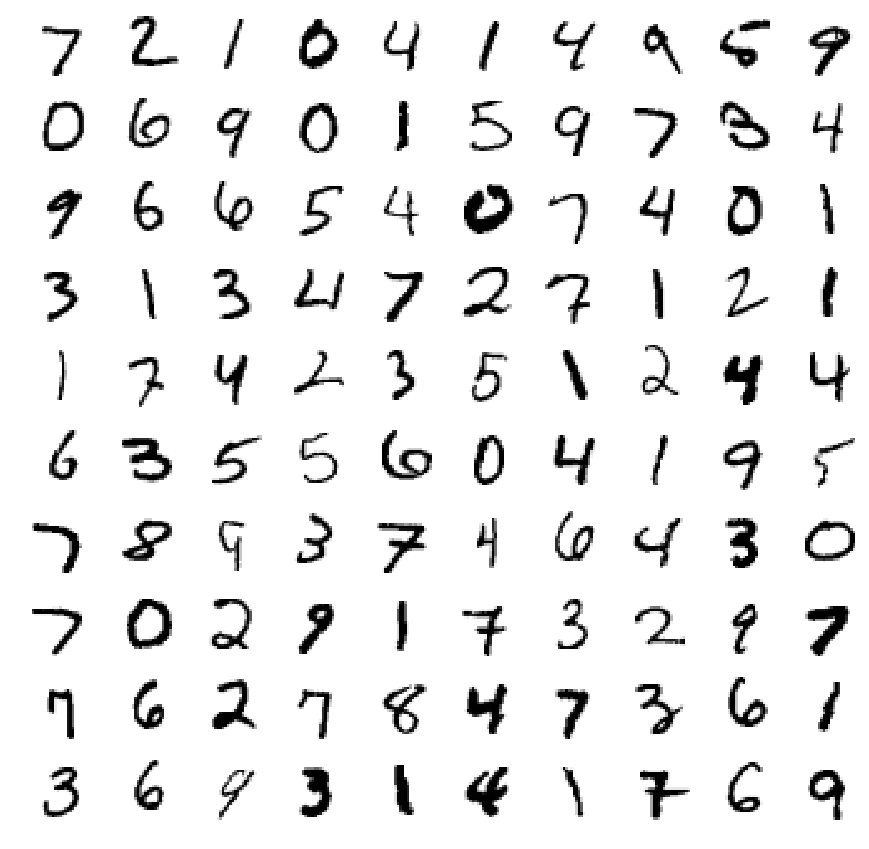

In [8]:
figure, subplots = plt.subplots(10, 10, figsize=(15, 15))
for i in range(10):
    for j in range(10):
        subplots[i][j].axis('off')
        subplots[i][j].imshow(np.reshape(test_X[j+10*i], (28,28)), cmap='binary')
print("true labels:")
print(test_y[:100])

predict_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": test_X[:100]}, shuffle=False)
predictions = np.array([label for label in mnist_classifier.predict(input_fn=predict_input_fn)])
print("predictions:")
print(predictions)

# 2: Accuracy
Die Accuacy gibt an, wie genau oder gut unser Model die Daten klassifiziert. Ein Wert von 1 wäre hier eine richtige Klassifikation aller Eingabedaten. Bei Postleitzahlen auf Briefen bedeutet eine Accuracy von 99%, dass jede Zahl mit einer Genauigkeit von 99% erkannt wird. Die esamte Postleitzahl wird dann mit der Genauigkeit "Accuracy^Anzahl der Zahlen" erkannt
# 3: Implementierung und Test
Das Model erkennt nicht alle Zahlen korrekt. Eine 4 wird als 6 erkannt.
# 4: Beschreibung der Implementierung
In der Estimator API wird die Struktur des Modells angegeben. In diesem Fall Werden Die Daten zunächst durch eine Convolutional Layer mit acht 5x5 Kernels geschickt und danach über das Maximum zu 2x2 Blöcken zusammengefasst. An dieser Stelle liegen die Daten in der acht 14x14 Layers vor. 
Anschießend folgt eine zweite Convolutional Layer mit 16 5x5 Kernels und wiederum einer Zusammenfassung über das Maximum zu 2x2 Blöcken. Die Daten sind hier in 16 7x7Layers. Beide dieser Convolutional Layers verwenden die RelU Aktivierungsfuntion.
Anschließend werden die Daten "glattgebügelt" (flattened), also die Struktur der 784 Daten entfernt.
Dann folgen mehrere Dense Layers. Zunächst eine 64 Nodes große und dann zu eine 10 Nodes große.
Diese 10 Nodes repräsentieren dann die Zahlen von 0-9.
# 5: Experimentation